## Lecture Note

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

Text(0, 0.5, 'Number of Jobs')

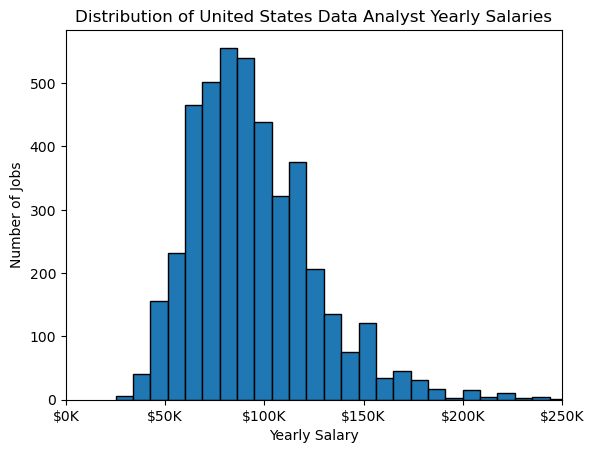

In [18]:
df_us = df[df['job_country']=='United States'].copy()
df_da_us = df_us[df_us['job_title_short']=='Data Analyst']
df_da_us['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

## Homework

Text(0.5, 1.0, 'Distribution of Data Scientist Hourly Salaries')

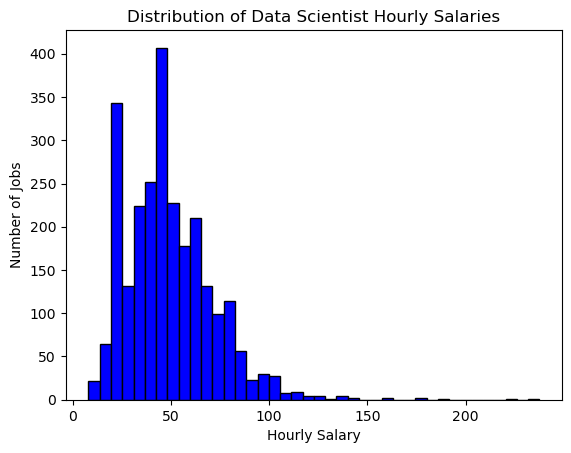

In [24]:
df_ds = df[df['job_title_short']=='Data Scientist'].copy()
df_ds['salary_hour_avg'].plot(kind='hist',bins=40,color='blue',edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')

Text(0.5, 1.0, 'Distribution of Job Postings by Number of Skills')

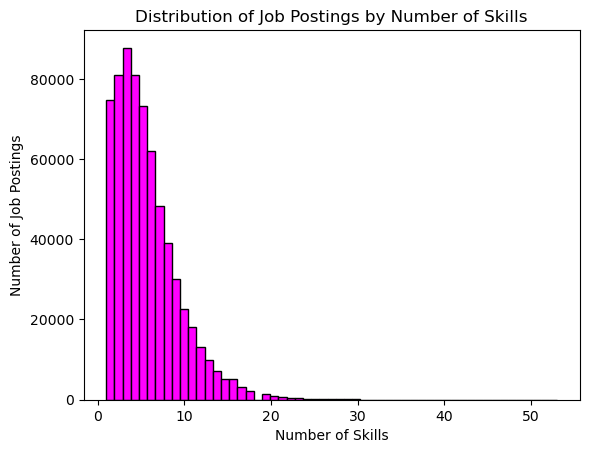

In [49]:
df_skills= df.copy()
df_skills = df_skilled.dropna(subset='job_skills').reset_index(drop=True)
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
df_skills['num_skills'].plot(kind='hist',bins=55,color='magenta',edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills')

Text(0.5, 1.0, 'Distribution of Data Engineer Salaries')

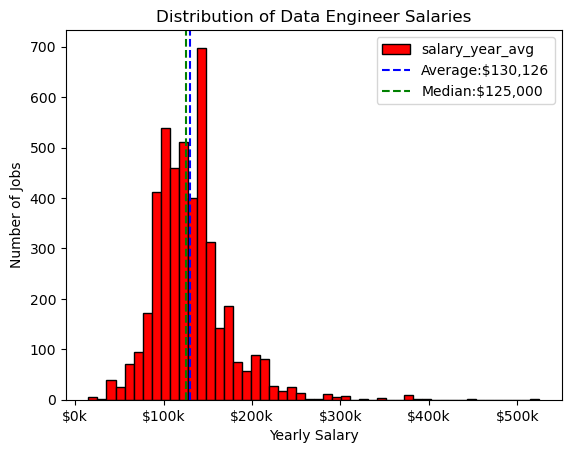

In [66]:
df_de=df[df['job_title_short']=='Data Engineer'].copy()
df_de_median = df_de['salary_year_avg'].median()
df_de_avg = df_de['salary_year_avg'].mean()
df_de['salary_year_avg'].plot(kind='hist',bins=50,color='red',edgecolor='black')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.axvline(df_de_avg,color='blue',linestyle='--',label=f'Average:${df_de_avg:,.0f}')
plt.axvline(df_de_median,color='green',linestyle='--',label=f'Median:${df_de_median:,.0f}')
plt.legend()
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Salaries')